In [6]:
import numpy as np

In [8]:
!pip install scikit-learn
    

In [10]:
import pandas as pd

In [12]:
# reading csv file
df = pd.read_csv('spam.csv')

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 606-607: invalid continuation byte

In [14]:
import pandas as pd

# Tell pandas the encoding to use
df = pd.read_csv('spam.csv', encoding='latin1')


In [16]:
df.sample(4)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2144,spam,FreeMsg: Hey - I'm Buffy. 25 and love to satis...,NaN,NaN,NaN
3488,ham,I'm also came to room.,NaN,NaN,NaN
3683,ham,Dad says hurry the hell up,NaN,NaN,NaN
2854,ham,Your gonna be the death if me. I'm gonna leave...,NaN,NaN,NaN


In [18]:
df.sample(4)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2548,ham,Honestly i've just made a lovely cup of tea an...,NaN,NaN,NaN
4614,spam,Sunshine Quiz! Win a super Sony DVD recorder i...,NaN,NaN,NaN
2751,ham,Play w computer? Aiyah i tok 2 u lor?,NaN,NaN,NaN
1818,ham,Am i that much dirty fellow?,NaN,NaN,NaN


In [26]:
df.sample(7)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4533,ham,I have no money 4 steve mate! !,NaN,NaN,NaN
2444,ham,"Yes but i dont care! I need you bad, princess!",NaN,NaN,NaN
1675,ham,Painful words- \I thought being Happy was the ...,the toughest is acting Happy with all unspoke...,NaN,NaN
1775,ham,Did u see what I posted on your Facebook?,NaN,NaN,NaN
118,ham,Hmm...my uncle just informed me that he's payi...,NaN,NaN,NaN
3125,ham,U coming 2 pick me?,NaN,NaN,NaN
4845,ham,Pls help me tell Ashley that i cant find her n...,NaN,NaN,NaN


In [797]:
df.sample(7)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4103,ham,Do u hav any frnd by name ashwini in ur college?,NaN,NaN,NaN
3390,ham,"I'm in a meeting, call me later at",NaN,NaN,NaN
1836,ham,Are you wet right now?,NaN,NaN,NaN
1010,ham,Lol I would but my mom would have a fit and te...,NaN,NaN,NaN
3698,ham,How i noe... Did Ì_ specify da domain as nusst...,NaN,NaN,NaN
3350,ham,At what time are you coming.,NaN,NaN,NaN
2506,ham,Who u talking about?,NaN,NaN,NaN


In [28]:
# to check no of rows and columns of our dataset"spam.csv'
df.shape

(5572, 5)

In [30]:
# STAGES INVOLVED IN THE SMS SPAM DETECTION USING ML PROJECT

# 1. Data Cleaning
# 2. EDA ( Exploratory Data Analysis )
# 3. Data Preprocesing ( Vectorisation, Stemming, Removing stop words )
# 4. Model Building
# 5. Evaluation of model
# 6  Improvements
# 7. Website creation for the project
# 8. Deployment of the project on Heroku or Netlify or Vercel


##  1. DATA CLEANING

In [33]:
# To know the information of the data set items ( row, columns, values ;etc)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [35]:
# the 3 data( 2,3,4) have irrelevant itmes( have mising important values)
# so we will drop/delete it as
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [39]:
df.sample(5)

,v1,v2
3430,ham,Yeah if we do have to get a random dude we nee...
2215,ham,Prabha..i'm soryda..realy..frm heart i'm sory
4151,ham,What's nannys address?
5165,ham,ÌÏ still got lessons? ÌÏ in sch?
2177,ham,Oh k :)why you got job then whats up?


In [41]:
# We will remove the column name As v1, v2 are not descriptive names
# Renaming the columns
df.rename(columns={'v1':'Target', 'v2':'Text'},inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  5572 non-null   object
 1   Text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [45]:
df.sample(3)

,Target,Text
871,ham,Its going good...no problem..but still need li...
3671,ham,"came to look at the flat, seems ok, in his 50..."
2587,ham,"Aight, see you in a bit"


In [47]:
# Assigning  'ham' to 0 and 'Spam' to 1,  get it read properly
from sklearn.preprocessing import LabelEncoder


In [51]:
encoder = LabelEncoder()

In [53]:
encoder.fit_transform(df['Target'])

array([0, 0, 1, ..., 0, 0, 0])

In [55]:
df.sample(10)

,Target,Text
118,ham,Hmm...my uncle just informed me that he's payi...
3970,spam,Free video camera phones with Half Price line ...
912,ham,Can't. I feel nauseous. I'm so pissed. I didn'...
5209,ham,"I know you are thinkin malaria. But relax, chi..."
2893,ham,K...k...yesterday i was in cbe .
4601,ham,\Hey j! r u feeling any better
5421,ham,"Hi elaine, is today's meeting confirmed?"
2534,ham,Ok enjoy . R u there in home.
3638,ham,Wat's da model num of ur phone?
170,ham,"Sir, I need AXIS BANK account no and bank addr..."


In [57]:
df['Target']=encoder.fit_transform(df['Target'])

In [59]:
# .head to start from initial
df.head(6)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...


In [61]:
df.sample(9)

,Target,Text
5327,0,Wishing you a wonderful week.
3467,0,yay! finally lol. i missed our cinema trip las...
1407,0,Then we gotta do it after that
2193,0,I called but no one pick up e phone. I ask bot...
1347,0,She doesnt need any test.
4662,0,No. Yes please. Been swimming?
722,0,That is wondar full flim.
1664,0,ÌÏ v ma fan...
92,0,Smile in Pleasure Smile in Pain Smile when tro...


##  1.1 Checking Missing values

In [64]:
# Get the total no. of missing values if any
df.isnull().sum()

Target    0
Text      0
dtype: int64

## 1.2 Check for Duplicate values

In [67]:
df.duplicated().sum()

403

In [69]:
# It means there are 403 duplicate values which should be removed as
df.drop_duplicates(keep='first')

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [71]:
df=df.drop_duplicates(keep='first')

In [73]:
df.duplicated().sum()

0

In [75]:
df.shape

(5169, 2)

# ---------------- DATA CLEANING COMPLETED -----------------------

## 2. EDA STARTS ( Understanding Data)

In [79]:
# as my data frame is as
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [81]:
df.value_counts()

Target  Text                                                                                                                              
0        &lt;#&gt;  in mca. But not conform.                                                                                                  1
        Thats cool. i liked your photos. You are very sexy!                                                                                   1
        That's good, because I need drugs                                                                                                     1
        That's fine, have him give me a call if he knows what he wants or has any questions                                                   1
        That's fine, I'll bitch at you about it later then                                                                                    1
                                                                                                                                             

In [83]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

In [85]:
output = df['Target'].value_counts()
output.name = 'Target'  # Set the Series name explicitly
print(output)


Target
0    4516
1     653
Name: Target, dtype: int64


In [87]:
print(df['Target'].head())


0    0
1    0
2    1
3    0
4    0
Name: Target, dtype: int32


In [89]:
output = df['Target'].value_counts()
output.name = 'Target'  # Rename the Series explicitly
print(output)


Target
0    4516
1     653
Name: Target, dtype: int64


In [91]:
output = df['Target'].value_counts()
output.index.name = None  # Remove the index name
output.name = 'Target'    # Set the Series name
print(output)


0    4516
1     653
Name: Target, dtype: int64


In [93]:
# Ham ( Legit, Real) is 4516 data
# Spam ( Unreal, Fake) is only 653 data

In [95]:
# BETTER REPRESENATION USING PIECHART
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x14b9acbd880>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

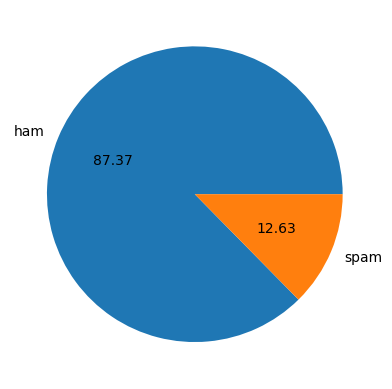

In [129]:
plt.pie(df['Target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')

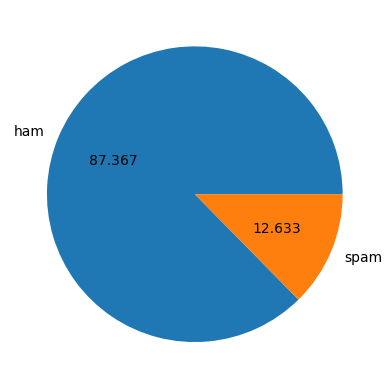

In [131]:
plt.pie(df['Target'].value_counts(), labels=['ham', 'spam'], autopct='%0.3f')
plt.show()

## Data Imbalancing is there ( b/w ham and spam)

In [134]:
#  DEEPER ANALYSIS INCLUDES
#  COUNT NO. OF "CHARACTERS", "WORDS", "SENTENCES" ;etc

In [136]:
# IMPORTING NATURAL LANGUAGE TOOLKIT LIBRARY AS so first 'pip install nltk' IN CMD   and download dependencies as [nltk.download('punkt')] in PYTHON
import nltk

In [138]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maity\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 2.1 a) Count No of Characeters

In [141]:
# a) So for this first count length in terms of CHARACTERS used in each sms
df['Text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: Text, Length: 5169, dtype: int64

In [143]:
# Putting the Calculated lengths in a new column 'num_characters'
df['num_characters']=df['Text'].apply(len)

In [145]:
df.head() # showing the updated changes from  initial coloumn-row

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


## 2.1 b) Count No of WORDS

In [148]:
# b) Now, for no of words count, first Breaking text WORD-by Word basis as
df['Text'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Text, Length: 5169, dtype: object

In [150]:
# Counting the length only so use 'len' as 
df['Text'].apply(lambda x: len( nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: Text, Length: 5169, dtype: int64

In [152]:
# putting it in new column 'num_words'
df['num_words']=df['Text'].apply(lambda x: len( nltk.word_tokenize(x)))

In [154]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


## 2.1 c) Count No of  SENTENCES

In [157]:
# c) Now, for no of SENTENCES count:-
df['Text'].apply(lambda x: nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: Text, Length: 5169, dtype: object

In [159]:
# c) Now, for no of SENTENCES count:-
df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: Text, Length: 5169, dtype: int64

In [161]:
df['num_sentences']=df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [163]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [165]:
# DESCRIBE ALL THESE COLUMNS
df[['num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [167]:
# DECRIBE 'HAM' as Target==0 is for ham MESSAGES DETAILS
df[df['Target']==0]

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
6,0,Even my brother is not like to speak with me. ...,77,18,2
...,...,...,...,...,...
5565,0,Huh y lei...,12,4,1
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [169]:
# DECRIBE 'HAM' as Target==0 is for ham MESSAGES DETAILS
df[df['Target']==0][['num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [171]:
# For SPAM Messages [ Target==1]
df[df['Target']==1][['num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [173]:
# Plotting Historgram to see details clearly
import seaborn as sns

In [175]:
# 1. Extrating all 'sham' messages as
df[df["Target"]==0]

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
6,0,Even my brother is not like to speak with me. ...,77,18,2
...,...,...,...,...,...
5565,0,Huh y lei...,12,4,1
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [177]:
# 2. Extrating all 'spam' messages as
df[df["Target"]==1]

,Target,Text,num_characters,num_words,num_sentences
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
8,1,WINNER!! As a valued network customer you have...,158,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1


In [179]:
# Plotting Histogram for both 'ham'  of 'num_characters'
df[df["Target"]==0]['num_characters']

0       111
1        29
3        49
4        61
6        77
       ... 
5565     12
5568     37
5569     57
5570    125
5571     26
Name: num_characters, Length: 4516, dtype: int64

<Axes: xlabel='num_characters', ylabel='Count'>

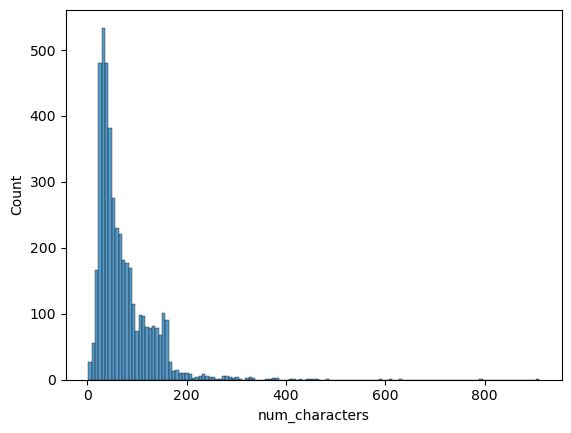

In [181]:
# Plotting Histogram for both 'ham'  of 'num_characters'
sns.histplot(df[df["Target"]==0]['num_characters'])

<Axes: xlabel='num_characters', ylabel='Count'>

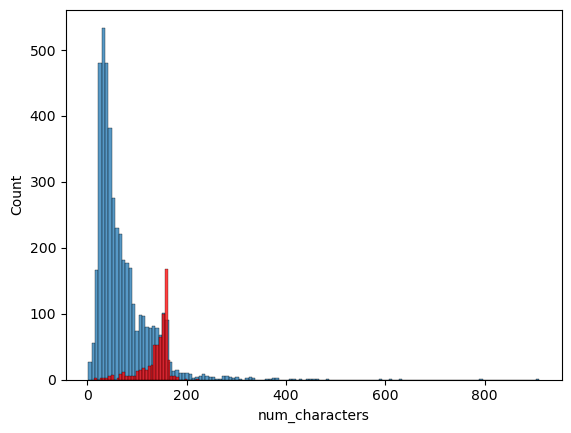

In [183]:
# Plotting Histogram for both 'ham' and 'spam' of 'num_characters'
sns.histplot(df[df["Target"]==0]['num_characters'])
sns.histplot(df[df["Target"]==1]['num_characters'], color='red')

<Axes: xlabel='num_characters', ylabel='Count'>

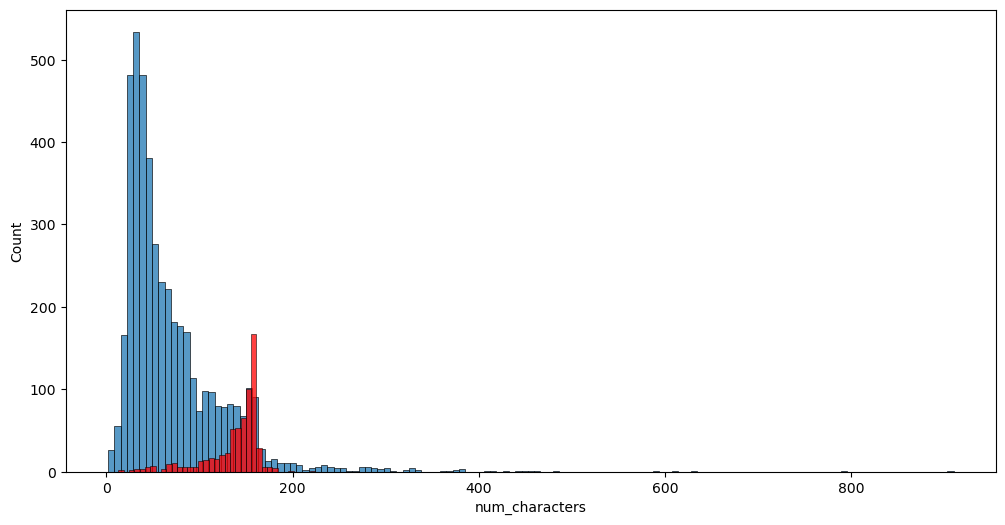

In [185]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df["Target"]==0]['num_characters'])
sns.histplot(df[df["Target"]==1]['num_characters'], color='red')

In [187]:
# For words
df[df["Target"]==0]['num_words']

0       24
1        8
3       13
4       15
6       18
        ..
5565     4
5568     9
5569    15
5570    27
5571     7
Name: num_words, Length: 4516, dtype: int64

<Axes: xlabel='num_words', ylabel='Count'>

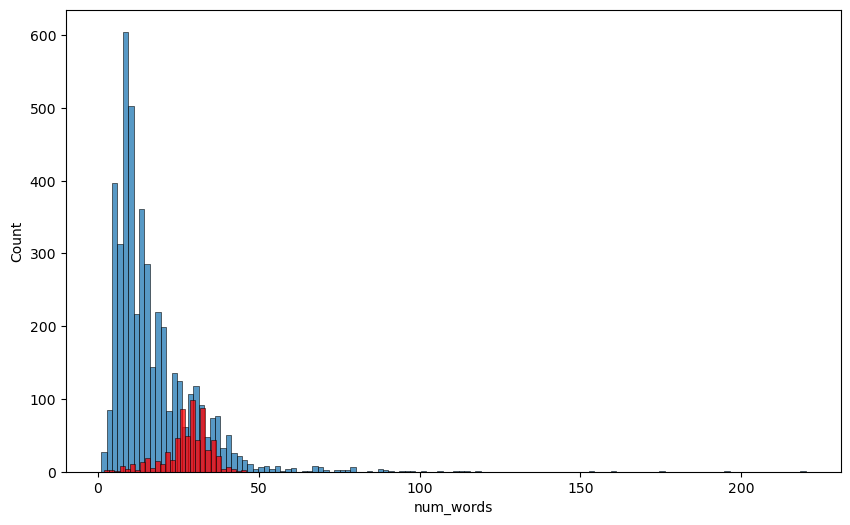

In [189]:
# For words
plt.figure(figsize=(10, 6))
sns.histplot(df[df["Target"]==0]['num_words'])
sns.histplot(df[df["Target"]==1]['num_words'], color='red')

In [191]:
# For sentences
df[df["Target"]==0]['num_sentences']

0       2
1       2
3       1
4       1
6       2
       ..
5565    1
5568    1
5569    2
5570    1
5571    2
Name: num_sentences, Length: 4516, dtype: int64

<Axes: xlabel='num_sentences', ylabel='Count'>

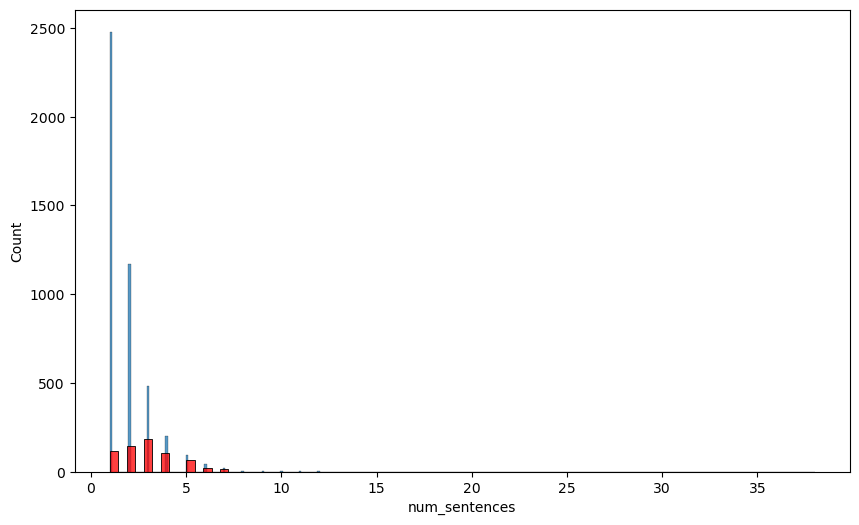

In [193]:

plt.figure(figsize=(10, 6))
sns.histplot(df[df["Target"]==0]['num_sentences'])
sns.histplot(df[df["Target"]==1]['num_sentences'], color='red')

# Finding Relationship between characters, words, sentences


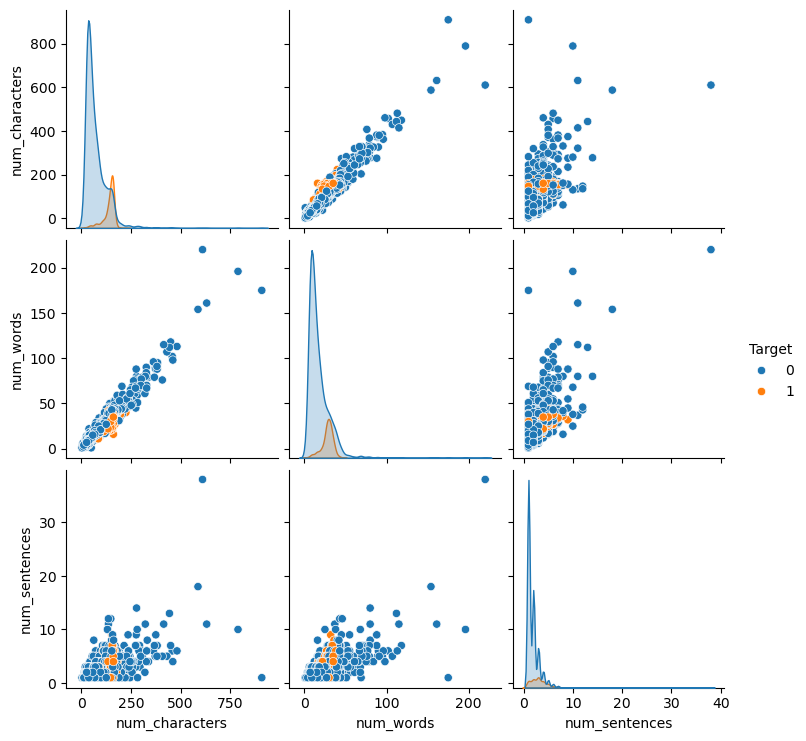

In [196]:
sns.pairplot(df,hue='Target')

In [198]:
print(df.dtypes)


Target             int32
Text              object
num_characters     int64
num_words          int64
num_sentences      int64
dtype: object


In [200]:
# FINDING CORRELATION COEFFICIENT
correlation_matrix = df.select_dtypes(include=['number']).corr()
print(correlation_matrix)

                  Target  num_characters  num_words  num_sentences
Target          1.000000        0.384717   0.262912       0.263939
num_characters  0.384717        1.000000   0.965760       0.624139
num_words       0.262912        0.965760   1.000000       0.679971
num_sentences   0.263939        0.624139   0.679971       1.000000


<Axes: >

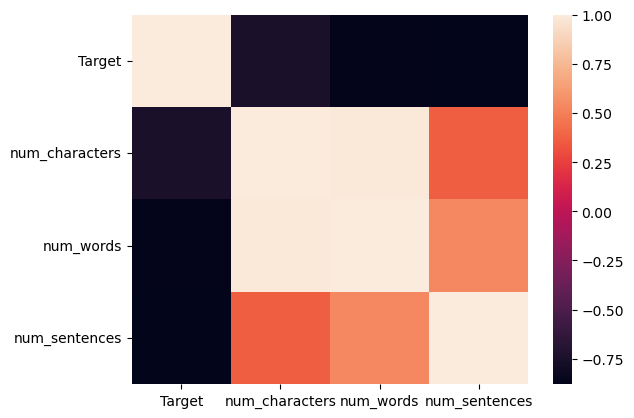

In [206]:
# For beter understanding, Use of Heatmap as
sns.heatmap(correlation_matrix.corr())

<Axes: >

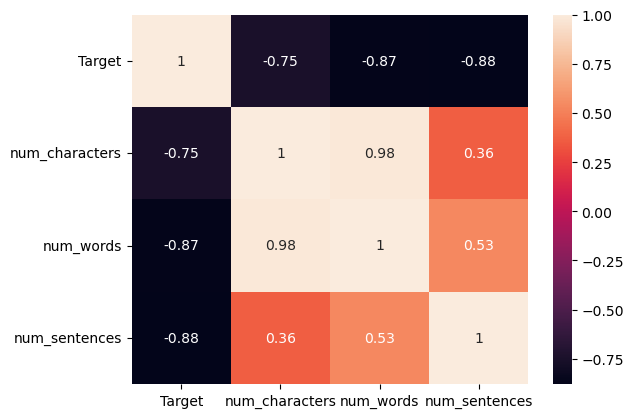

In [208]:
sns.heatmap(correlation_matrix.corr(), annot=True)

In [210]:
# Step 1: Select only numeric columns
numeric_columns = df.select_dtypes(include=[float, int])  # Selects columns with numbers (integers and floats)

# Step 2: Check for negative values in these numeric columns
negative_values_count = (numeric_columns < 0).sum()  # Counts how many negative values are there in each numeric column

# Print the result
print(negative_values_count)


Target            0
num_characters    0
num_words         0
num_sentences     0
dtype: int64


In [212]:
# Define data to be plotted
data = df['num_characters']  # Replace with the correct column you want to plot


In [214]:
min_value = data.min()
max_value = data.max()


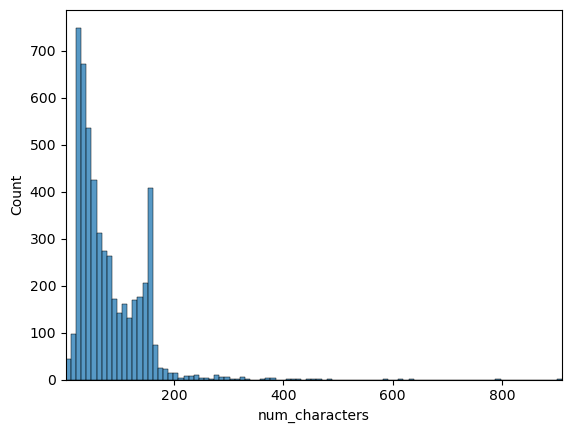

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the histogram
sns.histplot(data)

# Set x-axis limits
plt.xlim(min_value, max_value)

# Show the plot
plt.show()


In [218]:
correlation_matrix = df.corr()


ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [220]:
print(df.dtypes)


Target             int32
Text              object
num_characters     int64
num_words          int64
num_sentences      int64
dtype: object


In [222]:
# Exclude the 'Text' column
df_numeric = df.select_dtypes(include=[np.number])

# Now calculate the correlation matrix
correlation_matrix = df_numeric.corr()


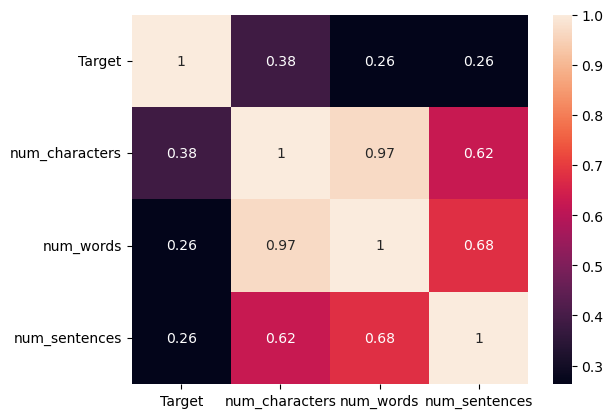

In [224]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
 #sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
sns.heatmap(correlation_matrix, annot=True)

# Show the plot
# Show the plot
plt.show()


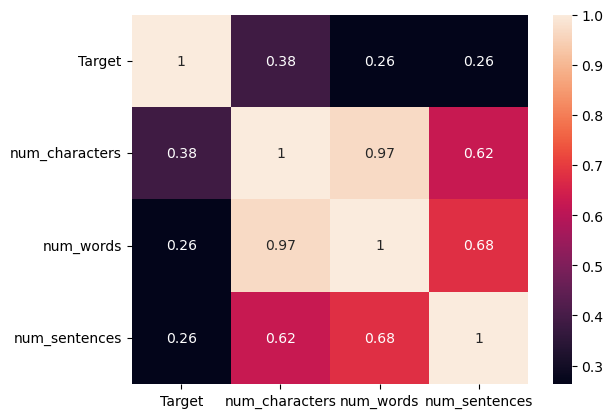

In [226]:
# just copying above as It is important
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
 #sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
sns.heatmap(correlation_matrix, annot=True)

# Show the plot
# Show the plot
plt.show()


# ----------------- EDA COMPLETED--------------

# *3. Data Preprocessing*
* Lower Case
* Tokenization
* Removing special characters
* Removing stop words and pucntuation
* Stemming( or Lametisation)

In [230]:
#  1.Lowercase
def transform_text(text):
    text=text.lower()
    return text

In [232]:
transform_text(' "Hi Everyone there" ')

' "hi everyone there" '

In [234]:
transform_text("Hi Everyone there")

'hi everyone there'

In [236]:
transform_text('Hi Everyone THERE')

'hi everyone there'

In [238]:
# 2. Tokenisation
import nltk
from nltk.tokenize import word_tokenize

def transform_text(text):
    text=text.lower()
    text = nltk.word_tokenize(text)
    return text




In [240]:
transform_text("Hi How ARE You?")

['hi', 'how', 'are', 'you', '?']

In [242]:
# 3. Removing Special characters ( remove @#$$%^ etc)
import nltk
from nltk.tokenize import word_tokenize

def transform_text(text):
    text=text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
        
    return y

In [244]:
transform_text("Hi Everyone there @how $ you ** tata chec!ked con~firm ")

['hi', 'everyone', 'there', 'how', 'you', 'tata', 'chec', 'ked']

In [246]:
transform_text("Hi How are YOU@#")

['hi', 'how', 'are', 'you']

In [248]:
transform_text("Hi How are @# ?")

['hi', 'how', 'are']

In [250]:
# 4. Removing stop words and punctuation
# first listing all stopwords, defined already
import nltk
from nltk.corpus import stopwords

# Download the stopwords if not already downloaded
nltk.download('stopwords')

# List of English stopwords
stopwords.words("english")



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maity\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [252]:
# Second, listing all punctuation marks
import string


In [254]:
# listing all punctuation marks
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [256]:
# Removing stop words (main)
import nltk
from nltk.corpus import stopwords
def transform_text(text):
    text=text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    
    text=y[:]  # cloning in text as lists are mutable 
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    return y

In [258]:
transform_text("DID you like my presentation on ML?")

['like', 'presentation', 'ml']

In [260]:
transform_text("hi are you Studying in Class 10?")

['hi', 'studying', 'class', '10']

In [262]:
transform_text("Did i my use more professional parameter in the code")

['use', 'professional', 'parameter', 'code']

In [264]:
# 5. Stemming (Danc<----- Dance, Danced,dancing, dances etc) pointing to its stem word
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer() # creating object
print(ps.stem('Dancing')) # examples of stemming process
print(ps.stem("Bought"))
print(ps.stem("Running"))
print(ps.stem("Singing"))
print(ps.stem("Buying"))
print(ps.stem("Loving"))
print(ps.stem("Typing"))
print(ps.stem("WRITing"))

danc
bought
run
sing
buy
love
type
write


In [266]:
# COMBINING ALL THINGS NEEDED FOR 'DATAPREPROCESSING' + STEMMING
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def transform_text(text):
    text=text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
         y.append(ps.stem(i))
    

    return " ".join(y)

In [268]:
transform_text("Hi Everyone there @how $ you ** tata chec!ked con~firm ")

'hi everyon tata chec ked'

In [270]:
transform_text("I loved YT Lectures on machine %$# Learning lecture, How about You? %H")

'love yt lectur machin learn lectur h'

In [272]:
df['Text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [274]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [276]:
df['Text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [278]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [280]:
# Creating a new column to store this transformation as
df['Text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Text, Length: 5169, dtype: object

In [282]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

def transform_text(text):
    text=text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
         y.append(ps.stem(i))
    

    return " ".join(y)


In [284]:
# Apply the function to your DataFrame column
df['Transformed_Text'] = df['Text'].apply(transform_text)

In [286]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# CREATING 'WORD CLOUD' FOR BOTH HAMS AND SPAM


In [289]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [291]:
# First, creating word cloud( display in bigger size) for "SPAM" messages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud object with proper parameters
wc = WordCloud(
    width=800,  # Width of the image
    height=500,  # Height of the image
    min_font_size=10,  # Minimum font size
    background_color='white')  # Background color

In [293]:
wc.generate(df[df['Target']==1]['Transformed_Text'].astype(str).str.cat(sep=" "))

In [295]:
spam_wc=wc.generate(df[df['Target']==1]['Transformed_Text'].astype(str).str.cat(sep=" "))

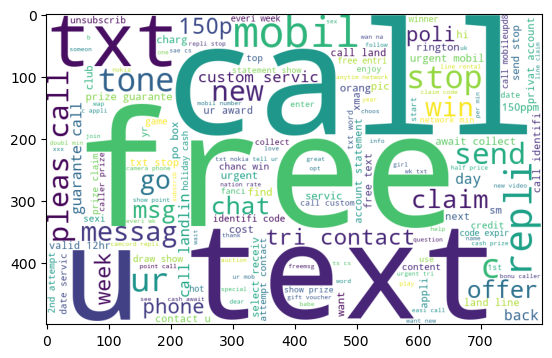

In [297]:
plt.imshow(spam_wc)

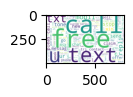

In [299]:
plt.figure(figsize=(1,8))
plt.imshow(spam_wc)

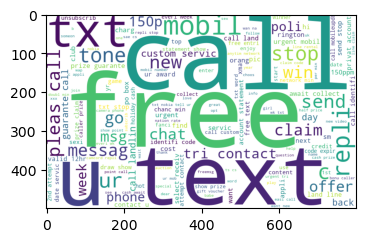

In [301]:
plt.figure(figsize=(4,10))
plt.imshow(spam_wc)

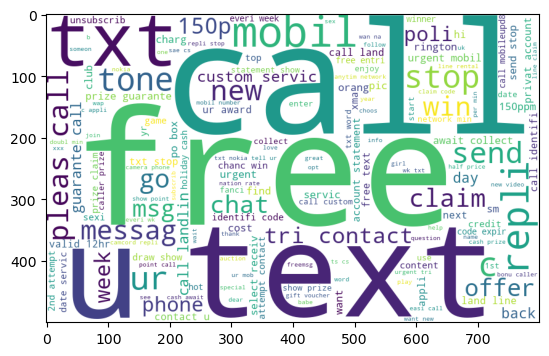

In [303]:
plt.figure(figsize=(30,4))
plt.imshow(spam_wc)

 # ----------------FOR HAM--------------------

In [306]:
print(df.columns)


Index(['Target', 'Text', 'num_characters', 'num_words', 'num_sentences',
       'Transformed_Text'],
      dtype='object')


In [308]:
ham_wc=wc.generate(df[df['Target']==0]['Transformed_Text'].astype(str).str.cat(sep=" "))

In [310]:
# Secondly, creating word cloud( display in bigger size) for "HAM" messages
wc.generate(df[df['Target']==0]['Transformed_Text'].str.cat(sep=" "))

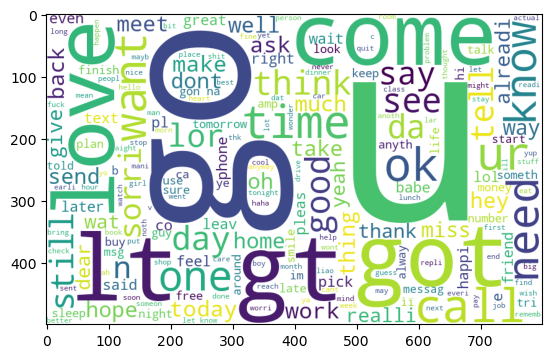

In [312]:
plt.imshow(ham_wc)

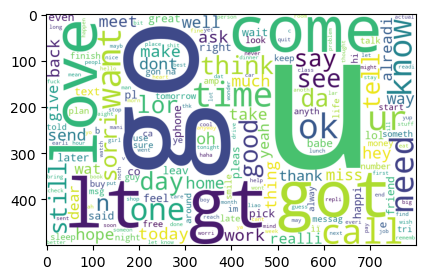

In [314]:
plt.figure(figsize=(12,3))
plt.imshow(ham_wc)

# We will see Top-30 Words of 'HAM' and 'SPAM'

In [317]:
df[df['Target']==1]

,Target,Text,num_characters,num_words,num_sentences,Transformed_Text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,six chanc win cash 100 pound txt csh11 send co...
...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3,want explicit sex 30 sec ring 02073162414 cost...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6,ask 3mobil 0870 chatlin inclu free min india c...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5,contract mobil 11 mnth latest motorola nokia e...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1,remind o2 get pound free call credit detail gr...


In [319]:
df[df['Target']==1]['Transformed_Text']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: Transformed_Text, Length: 653, dtype: object

In [321]:
# Creating list of those SMSs that are SPAM
df[df['Target']==1]['Transformed_Text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [323]:
for msg in df[df['Target']==1]['Transformed_Text'].tolist():
    print(msg)

free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv
winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030
six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt messag click http
england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq
thank subscript rington uk mobil charg pleas confirm repli ye repli charg
07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow
sm ac sptv new jersey devil detroit red wi

In [325]:
spam_corpus=[]
for msg in df[df['Target']==1]['Transformed_Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [327]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [329]:
len(spam_corpus)

9939

In [331]:
# Creating a Dictionary , that stores frequency of the words with the WORD
from collections import Counter
Counter(spam_corpus)

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

In [333]:
# Common words, Frequency ---->shown in distionary below as
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

# --------- got 30 most common SPAM words-----

In [336]:
# Putting the common words list in a Data Frame as
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [338]:
'''
from collections import Counter
import pandas as pd

# Assuming spam_corpus is a list of words
word_counts = Counter(spam_corpus[:30])  # Getting the first 30 words
df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

# Displaying the DataFrame
print(df)
'''

"\nfrom collections import Counter\nimport pandas as pd\n\n# Assuming spam_corpus is a list of words\nword_counts = Counter(spam_corpus[:30])  # Getting the first 30 words\ndf = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])\n\n# Displaying the DataFrame\nprint(df)\n"

In [340]:
'''
from collections import Counter
import pandas as pd

# Assuming spam_corpus is a list of words
common_words = Counter(spam_corpus).most_common(30)

# Convert the most common words into a DataFrame
df = pd.DataFrame(common_words)

# Display the DataFrame
print(df)
'''

'\nfrom collections import Counter\nimport pandas as pd\n\n# Assuming spam_corpus is a list of words\ncommon_words = Counter(spam_corpus).most_common(30)\n\n# Convert the most common words into a DataFrame\ndf = pd.DataFrame(common_words)\n\n# Display the DataFrame\nprint(df)\n'

In [342]:
# or dataframe printing as 
from collections import Counter
import pandas as pd

# Assuming spam_corpus is a list of words

pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


# Bar Plotting for 'SPAM' with most common 30 words

<Axes: ylabel='0'>

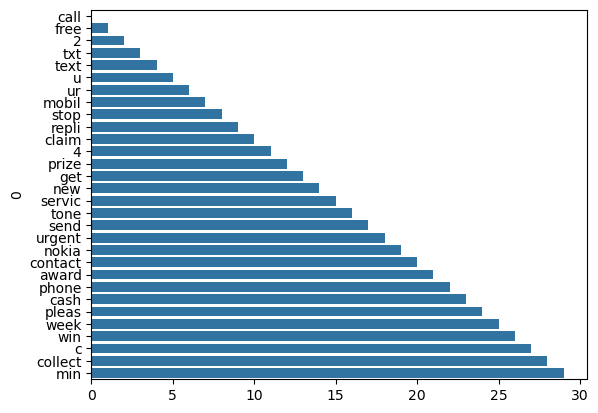

In [345]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0]) # for spam

<Axes: ylabel='1'>

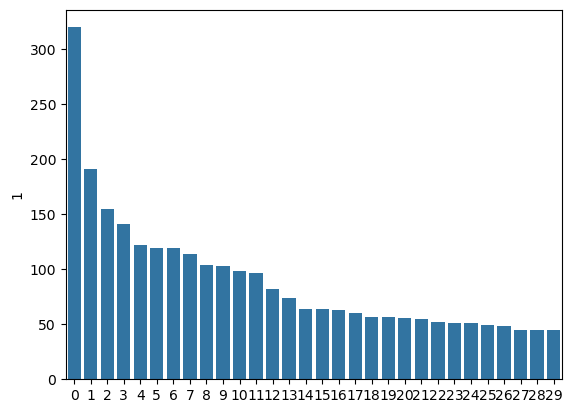

In [347]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[1]) # for spam

In [349]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])


TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

<Axes: xlabel='0', ylabel='1'>

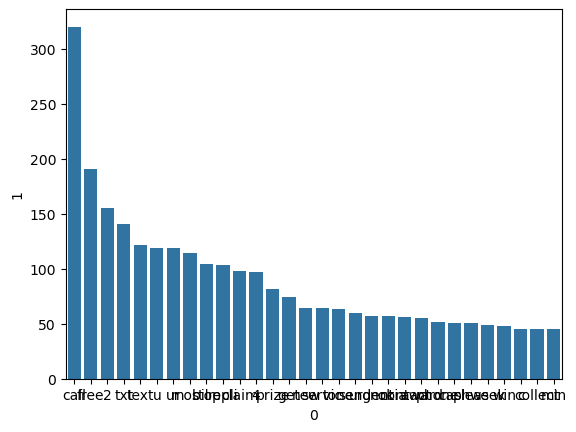

In [351]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

C:\Users\maity\AppData\Local\Temp\ipykernel_7788\445238549.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(palette='pastel',x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])


<Axes: xlabel='0', ylabel='1'>

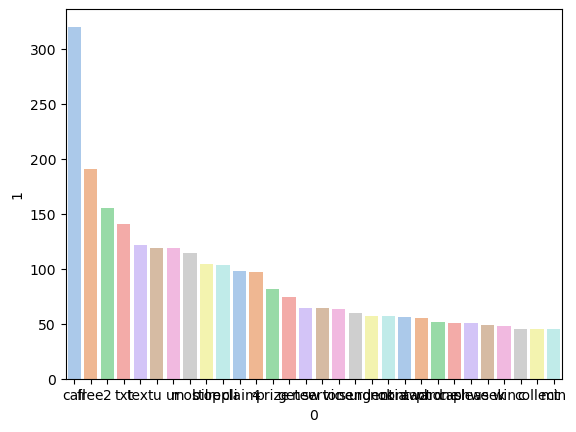

In [353]:
from collections import Counter
sns.barplot(palette='pastel',x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

C:\Users\maity\AppData\Local\Temp\ipykernel_7788\1832620640.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(palette='Spectral',x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])


<Axes: xlabel='0', ylabel='1'>

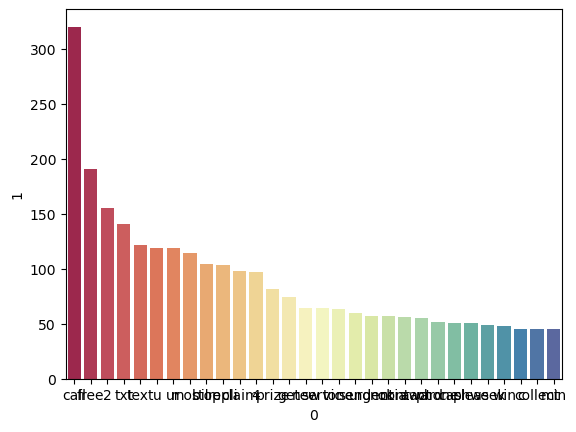

In [355]:
from collections import Counter
sns.barplot(palette='Spectral',x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

C:\Users\maity\AppData\Local\Temp\ipykernel_7788\2033565116.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(palette='Spectral',x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

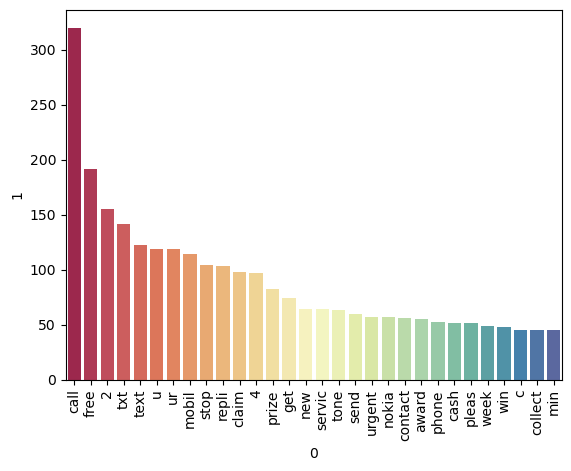

In [357]:
import pandas as pd
import seaborn as sns
from collections import Counter
sns.barplot(palette='Spectral',x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

C:\Users\maity\AppData\Local\Temp\ipykernel_7788\2705440017.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(palette='viridis',x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])


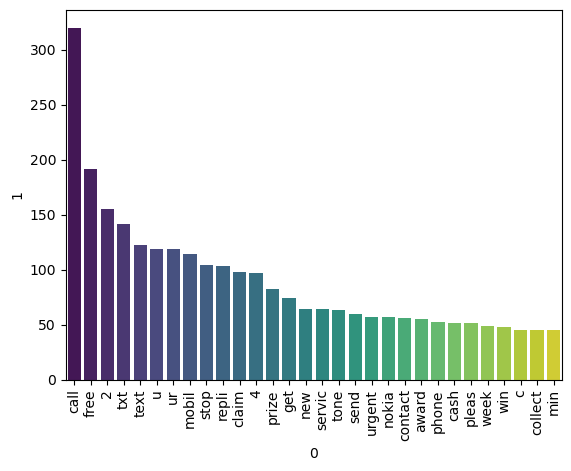

In [359]:
import pandas as pd
import seaborn as sns
from collections import Counter
sns.barplot(palette='viridis',x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# -----These were for spam, Now for 'HAM'-------

In [362]:
print(df.columns.tolist())


['Target', 'Text', 'num_characters', 'num_words', 'num_sentences', 'Transformed_Text']


In [364]:
print(type(df))  # Should output <class 'pandas.core.frame.DataFrame'>


<class 'pandas.core.frame.DataFrame'>


In [366]:
print(df['Target'].unique())


[0 1]


In [368]:
spam_messages = df[df['Target'] == 1]
print(spam_messages.head())  # This will show the first few spam messages


    Target                                               Text  num_characters  \
2        1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
5        1  FreeMsg Hey there darling it's been 3 week's n...             148   
8        1  WINNER!! As a valued network customer you have...             158   
9        1  Had your mobile 11 months or more? U R entitle...             154   
11       1  SIX chances to win CASH! From 100 to 20,000 po...             136   

    num_words  num_sentences  \
2          37              2   
5          39              4   
8          32              5   
9          31              3   
11         31              3   

                                     Transformed_Text  
2   free entri 2 wkli comp win fa cup final tkt 21...  
5   freemsg hey darl 3 week word back like fun sti...  
8   winner valu network custom select receivea pri...  
9   mobil 11 month u r entitl updat latest colour ...  
11  six chanc win cash 100 pound txt csh

In [370]:
df[df['Target'] == 0]



,Target,Text,num_characters,num_words,num_sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
...,...,...,...,...,...,...
5565,0,Huh y lei...,12,4,1,huh lei
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [372]:
df[df['Target']==0]['Transformed_Text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
6           even brother like speak treat like aid patent
                              ...                        
5565                                              huh lei
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Transformed_Text, Length: 4516, dtype: object

In [374]:
# Creating list of those SMSs that are HAM
df[df['Target']==0]['Transformed_Text'].tolist()

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'even brother like speak treat like aid patent',
 'per request mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'gon na home soon want talk stuff anymor tonight k cri enough today',
 'search right word thank breather promis wont take help grant fulfil promis wonder bless time',
 'date sunday',
 'oh k watch',
 'eh u rememb 2 spell name ye v naughti make v wet',
 'fine thatåõ way u feel thatåõ way gota b',
 'serious spell name',
 'go tri 2 month ha ha joke',
 'pay first lar da stock comin',
 'aft finish lunch go str lor ard 3 smth lor u finish ur lunch alreadi',
 'ffffffffff alright way meet sooner',
 'forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol',
 'lol alway convinc',
 'catch bu fri egg make tea eat mom left dinner feel love

In [376]:
for msg2 in df[df['Target']==0]['Transformed_Text'].tolist():
    print(msg2)

go jurong point crazi avail bugi n great world la e buffet cine got amor wat
ok lar joke wif u oni
u dun say earli hor u c alreadi say
nah think goe usf live around though
even brother like speak treat like aid patent
per request mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun
gon na home soon want talk stuff anymor tonight k cri enough today
search right word thank breather promis wont take help grant fulfil promis wonder bless time
date sunday
oh k watch
eh u rememb 2 spell name ye v naughti make v wet
fine thatåõ way u feel thatåõ way gota b
serious spell name
go tri 2 month ha ha joke
pay first lar da stock comin
aft finish lunch go str lor ard 3 smth lor u finish ur lunch alreadi
ffffffffff alright way meet sooner
forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol
lol alway convinc
catch bu fri egg make tea eat mom left dinner feel love
back amp pack car let know room
ahhh work vagu rememb feel like lol
wait stil

In [378]:
ham_corpus=[]
for msg2 in df[df['Target']==0]['Transformed_Text'].tolist():
    for word2 in msg2.split():
        ham_corpus.append(word2)
        

In [380]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [382]:
len(ham_corpus)

35404

In [384]:
# Creating a Dictionary , that stores frequency of the words with the WORD (ham)
from collections import Counter
Counter(ham_corpus)

Counter({'u': 883,
         'go': 404,
         'get': 349,
         'gt': 288,
         'lt': 287,
         '2': 284,
         'come': 275,
         'got': 236,
         'know': 236,
         'like': 234,
         'call': 233,
         'time': 219,
         'ok': 217,
         'love': 216,
         'good': 213,
         'want': 208,
         'ur': 197,
         'day': 190,
         'need': 170,
         'one': 165,
         'lor': 159,
         '4': 156,
         'home': 152,
         'think': 149,
         'see': 147,
         'take': 143,
         'still': 143,
         'da': 142,
         'tell': 133,
         'make': 129,
         'say': 127,
         'back': 127,
         'today': 123,
         'hope': 122,
         'ask': 121,
         'sorri': 121,
         'n': 120,
         'send': 120,
         'r': 120,
         'work': 118,
         'dont': 118,
         'meet': 112,
         'hi': 111,
         'well': 109,
         'thing': 109,
         'wat': 108,
         'k': 107,
  

In [386]:
# Common words, Frequency ---->shown in distionary below as
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

# -------- NOW, got 30 most common HAM words-----

<Axes: ylabel='0'>

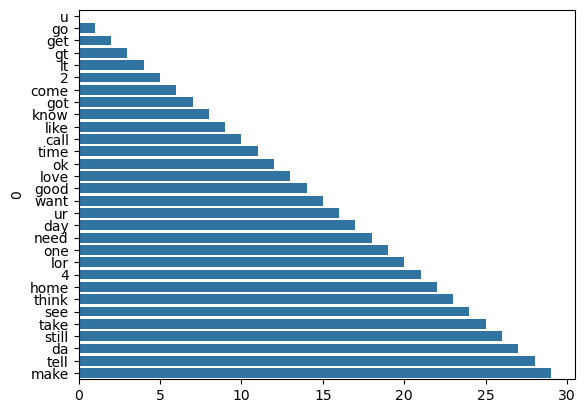

In [389]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0]) # for HAM

<Axes: ylabel='1'>

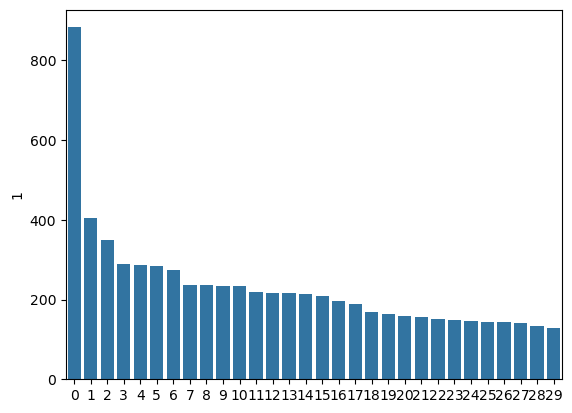

In [391]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[1]) # for ham

In [393]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])


TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

<Axes: xlabel='0', ylabel='1'>

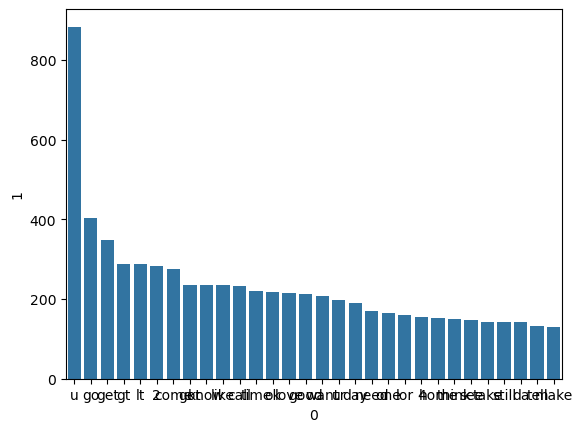

In [395]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])

C:\Users\maity\AppData\Local\Temp\ipykernel_7788\662483521.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(palette='pastel',x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])


<Axes: xlabel='0', ylabel='1'>

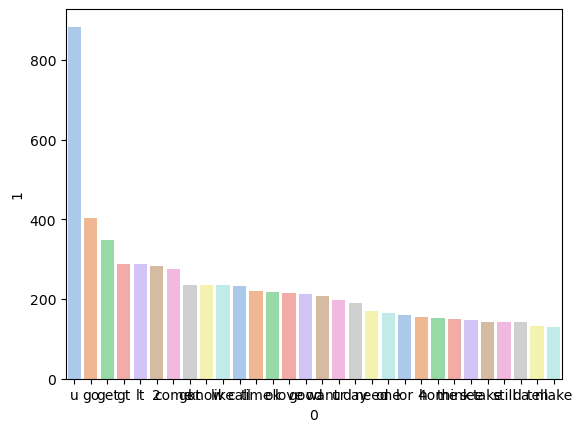

In [397]:
from collections import Counter
sns.barplot(palette='pastel',x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])

C:\Users\maity\AppData\Local\Temp\ipykernel_7788\3425519660.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(palette='Spectral',x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])


<Axes: xlabel='0', ylabel='1'>

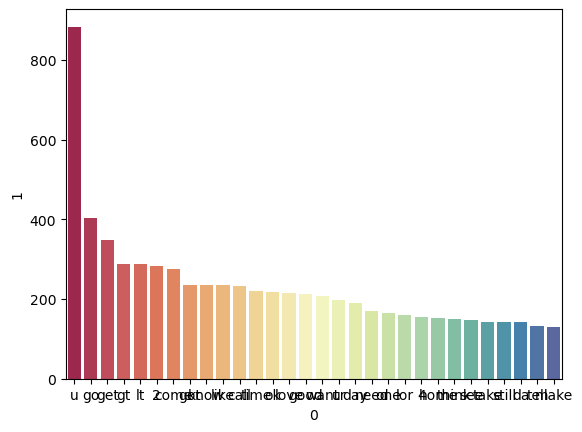

In [399]:
from collections import Counter
sns.barplot(palette='Spectral',x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])

C:\Users\maity\AppData\Local\Temp\ipykernel_7788\3165099044.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(palette='Spectral',x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

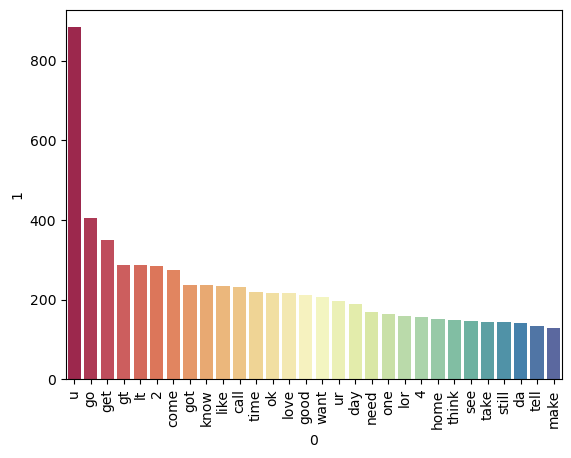

In [401]:
import pandas as pd
import seaborn as sns
from collections import Counter
sns.barplot(palette='Spectral',x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

C:\Users\maity\AppData\Local\Temp\ipykernel_7788\2705440017.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(palette='viridis',x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])


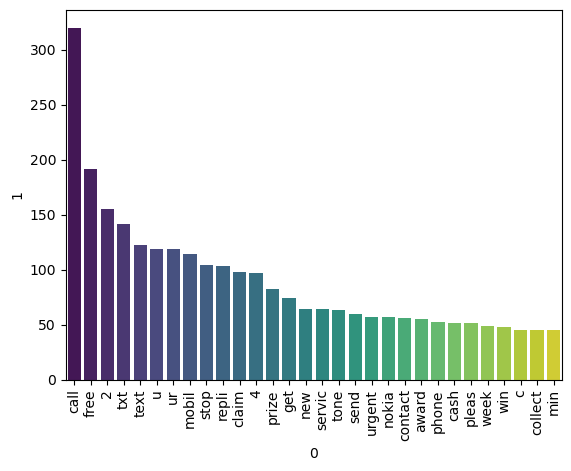

In [403]:
import pandas as pd
import seaborn as sns
from collections import Counter
sns.barplot(palette='viridis',x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# ----EDA AND DATA PROCESSING COMPLETED ---

# 4. Model Building STARTS

# 4.a) Model on Naive-BAYES Algorithm ( as wroking with texts)

# Converting Text to Vectors
* 4.a.1) Bag Of Words

In [409]:
from sklearn.feature_extraction.text import CountVectorizer

In [411]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [413]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer
X = cv.fit_transform(df['Transformed_Text'])

AttributeError: 'Series' object has no attribute '_validate_params'

In [415]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
cv = CountVectorizer()

# Apply the fit_transform method to the 'Transformed_Text' column
X = cv.fit_transform(df['Transformed_Text'])

# If you want to convert the sparse matrix to an array (optional):
X_array = X.toarray()


In [417]:
X.shape

(5169, 6708)

In [421]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [423]:
y = df['Target'].values

In [425]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [427]:
# Train Testing and Metrics
from sklearn.model_selection import train_test_split

In [429]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=2)

In [431]:
# CALLING ALGORITHMS
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_scorea,confusion_matrix,precision_score

ImportError: cannot import name 'accuracy_scorea' from 'sklearn.metrics' (C:\Users\maity\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

In [433]:
# CALLING ALGORITHMS
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [435]:
# CREATRING OBJECTS OF THOSE  TWO ALGORITHMS
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [437]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))

TypeError: Sparse data was passed for X, but dense data is required. Use '.toarray()' to convert to a dense numpy array.

In [438]:
print(X_train.shape)
print(y_train.shape)


(4135, 6708)
(4135,)


In [441]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())

AttributeError: 'csr_matrix' object has no attribute 'isnull'

In [443]:
import numpy as np
X_train_dense = X_train.toarray()
print(np.any(np.isnan(X_train_dense)))

False


In [445]:
print(X_train_dense.shape)  # Should be (n_samples, n_features)
print(y_train.shape)        # Should be (n_samples,)


(4135, 6708)
(4135,)


In [447]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)  # Encode categorical labels

In [449]:
# Using Gaussian Naive Bayes (without scaling)
gnb.fit(X_train_dense, y_train_encoded)
y_pred1 = gnb.predict(X_test.toarray())  # Convert X_test to dense format if needed
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Precision Score:", precision_score(y_test, y_pred1))


Accuracy: 0.8800773694390716
Confusion Matrix:
 [[792 104]
 [ 20 118]]
Precision Score: 0.5315315315315315


In [450]:
# Using Multinomial Naive Bayes (without scaling)
mnb.fit(X_train, y_train)  # MultinomialNB directly supports sparse matrices
y_pred2 = mnb.predict(X_test)  # No need to convert X_test to dense format
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Precision Score:", precision_score(y_test, y_pred2))


Accuracy: 0.9642166344294004
Confusion Matrix:
 [[871  25]
 [ 12 126]]
Precision Score: 0.8344370860927153


In [453]:
# Using Bernoulli Naive Bayes (without scaling)
bnb.fit(X_train, y_train)  # BernoulliNB directly supports sparse matrices
y_pred3 = bnb.predict(X_test)  # No need to convert X_test to dense format
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("Precision Score:", precision_score(y_test, y_pred3))

Accuracy: 0.9700193423597679
Confusion Matrix:
 [[893   3]
 [ 28 110]]
Precision Score: 0.9734513274336283


# 4.a.2) TF-IDF (Term Frequency-Inverse Document Frequency)

In [456]:
# Model buidling ( Improvement is done in further steps)
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [458]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [460]:
X = tfidf.fit_transform(df['Transformed_Text'])

In [462]:
X_array = X.toarray()

In [464]:
X.shape

(5169, 6708)

In [466]:
y = df['Target'].values

In [468]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [470]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=2)

In [472]:
# CALLING ALGORITHMS
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [474]:
# Again, CREATRING OBJECTS OF THOSE  TWO ALGORITHMS
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [476]:
# Using Gaussian Naive Bayes (without scaling) 
gnb.fit(X_train_dense, y_train_encoded)
y_pred1 = gnb.predict(X_test.toarray())  # Convert X_test to dense format if needed
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Precision Score:", precision_score(y_test, y_pred1))


Accuracy: 0.8762088974854932
Confusion Matrix:
 [[793 103]
 [ 25 113]]
Precision Score: 0.5231481481481481


In [478]:
# Using Multinomial Naive Bayes (without scaling) on TF-IDF
mnb.fit(X_train, y_train)  # MultinomialNB directly supports sparse matrices
y_pred2 = mnb.predict(X_test)  # No need to convert X_test to dense format
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Precision Score:", precision_score(y_test, y_pred2))


Accuracy: 0.9593810444874274
Confusion Matrix:
 [[896   0]
 [ 42  96]]
Precision Score: 1.0


In [480]:
# Using Bernoulli Naive Bayes (without scaling) oon TF-IDF
bnb.fit(X_train, y_train)  # BernoulliNB directly supports sparse matrices
y_pred3 = bnb.predict(X_test)  # No need to convert X_test to dense format
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("Precision Score:", precision_score(y_test, y_pred3))

Accuracy: 0.9700193423597679
Confusion Matrix:
 [[893   3]
 [ 28 110]]
Precision Score: 0.9734513274336283


 # So, As for now we would use TFIDF ----> mnb ( because of High - precision score)

In [483]:
# now comparing more algorithms, as:-

from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [485]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
    --------------------------------------- 1.6/124.9 MB 5.2 MB/s eta 0:00:24
    --------------------------------------- 2.1/124.9 MB 3.7 MB/s eta 0:00:34
    --------------------------------------- 2.1/124.9 MB 3.7 MB/s eta 0:00:34
   - -------------------------------------- 3.7/124.9 MB 3.7 MB/s eta 0:00:33
   - -------------------------------------- 3.7/124.9 MB 3.7 MB/s eta 0:00:33
   - -------------------------------------- 5.2/124.9 MB 3.7 MB/s eta 0:00:33
   - -------------------------------------- 6.0/124.9 MB 3.8 MB/s eta 0:00:32
   -- ------------------------------------- 7.1/124.9 MB 3.8 MB/s eta 0:00:32
   -- ------------------------------------- 7.3/124.9 MB 3.8 MB/s eta 0:00:31
   -- ------------------------------------- 8.7/124.9 MB 3.8 MB/s eta 0:00:31
   --- ------------------------------------ 9.4/124.9 MB 3.8 MB/s eta 0:00:31


In [487]:
# now comparing more algorithms, as:-

from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier

In [489]:
# Creating OBJECTS of the 11 algorithms
svc = SVC(kernel='sigmoid', gamma=1.0)  # Fixed `gamma-1.0` to `gamma=1.0`
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty="l1")  # Fixed penalty="11" to penalty="l1"
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)


In [491]:
# Creating A Dictionary{algo_name, obj_name}

clfs = {
      "SVC": svc,
      "KN": knc,
      "NB": mnb,
      'DT': dtc,
      'LR': lrc, 
      "RF": rfc,
      "AdaBoost": abc,
      "BgC": bc,
      "ETC": etc,
      "GBDT": gbdt, 
      "xgb": xgb
}

In [493]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy= accuracy_score(y_test,y_pred)
    precision= precision_score(y_test,y_pred)

    return accuracy, precision

In [495]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [497]:
train_classifier(knc,X_train,y_train,X_test,y_test)

(0.9003868471953579, 1.0)

In [499]:
# ---- these were just two otput of the algorithm, now we will represent it in a DataFrame
# Storing the ACCURACY and PRECISION for each Algorithm as

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy) 
    precision_scores.append(current_precision)

For SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For KN
Accuracy -  0.9003868471953579
Precision -  1.0
For NB
Accuracy -  0.9593810444874274
Precision -  1.0
For DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For LR
Accuracy -  0.9516441005802708
Precision -  0.94
For RF
Accuracy -  0.971953578336557
Precision -  1.0


C:\Users\maity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For xgb
Accuracy -  0.9700193423597679
Precision -  0.9147286821705426


In [501]:
# Representing in DataFrame
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores})

In [503]:
performance_df 

,Algorithm,Accuracy,Precision
0,SVC,0.972921,0.974138
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
3,DT,0.935203,0.838095
4,LR,0.951644,0.940000
5,RF,0.971954,1.000000
6,AdaBoost,0.961315,0.945455
7,BgC,0.958414,0.862595
8,ETC,0.972921,0.982456
9,GBDT,0.952611,0.923810


In [505]:
# Sorting on the basis of Precision
performance_df.sort_values(by='Precision', ascending=False)

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
10,xgb,0.970019,0.914729
7,BgC,0.958414,0.862595


In [507]:
performance_df1 = pd.melt(performance_df,id_vars='Algorithm')

In [509]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.972921
1,KN,Accuracy,0.900387
2,NB,Accuracy,0.959381
3,DT,Accuracy,0.935203
4,LR,Accuracy,0.951644
5,RF,Accuracy,0.971954
6,AdaBoost,Accuracy,0.961315
7,BgC,Accuracy,0.958414
8,ETC,Accuracy,0.972921
9,GBDT,Accuracy,0.952611


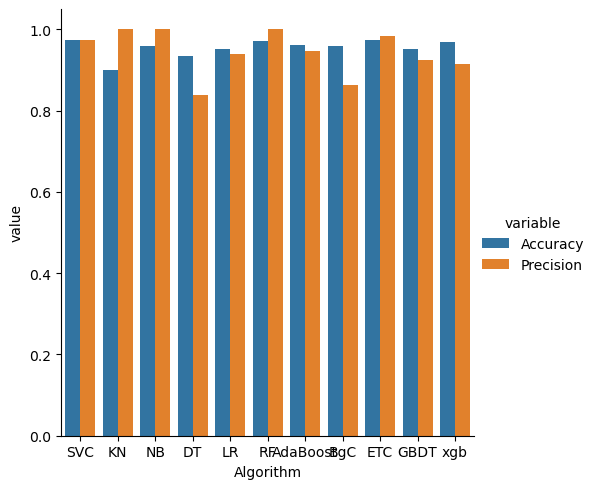

In [511]:
# Plotting graphs w.r.t to the algorithms
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1, kind='bar',height=5)


TypeError: _AxesBase.set_ylim() takes from 1 to 3 positional arguments but 5 were given

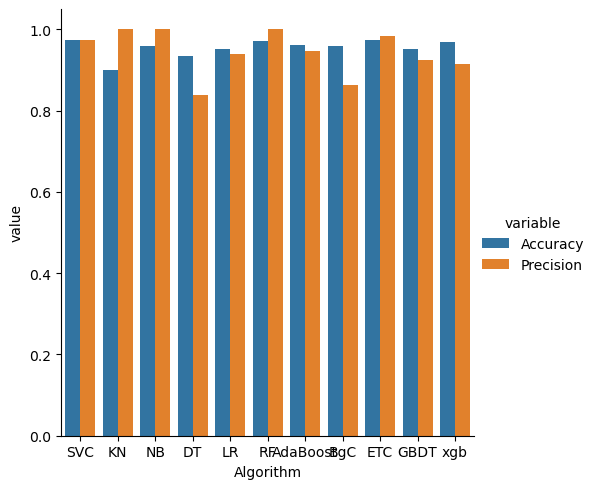

In [513]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0,5,1,0)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'SVC'),
  Text(1, 0, 'KN'),
  Text(2, 0, 'NB'),
  Text(3, 0, 'DT'),
  Text(4, 0, 'LR'),
  Text(5, 0, 'RF'),
  Text(6, 0, 'AdaBoost'),
  Text(7, 0, 'BgC'),
  Text(8, 0, 'ETC'),
  Text(9, 0, 'GBDT'),
  Text(10, 0, 'xgb')])

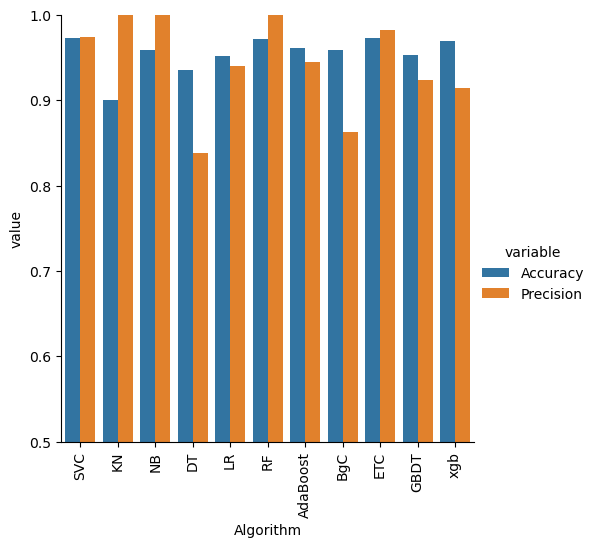

In [515]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')


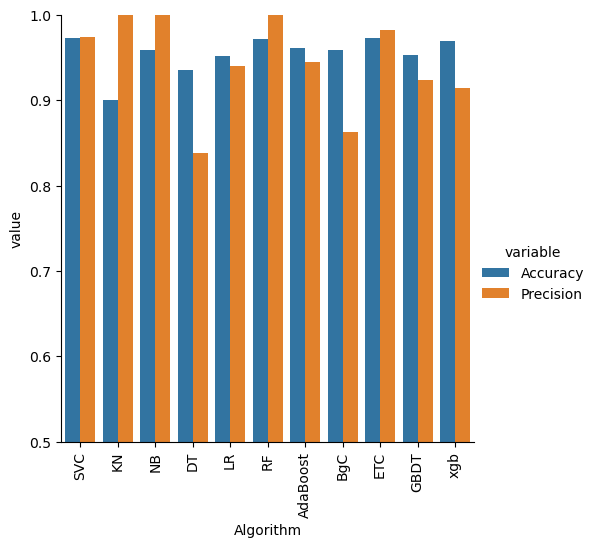

In [517]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1)
plt.xticks(rotation='vertical')
plt.show()

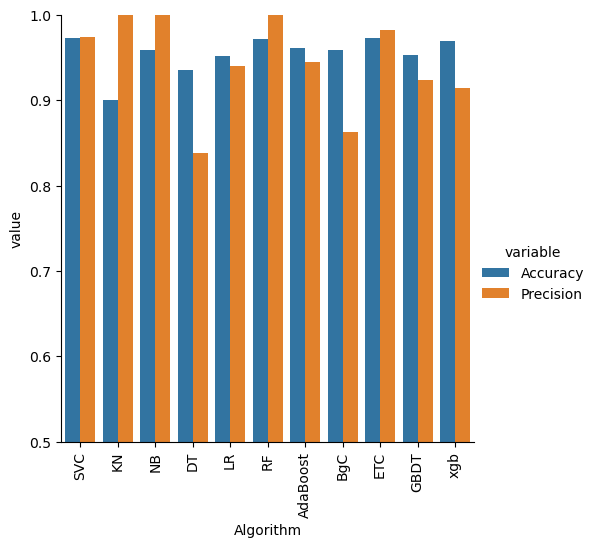

In [519]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# 4.b) MODEL IMPROVEMENT

* 4.b.1) Change the max_fearures parameter of Tf-Idf

# --- Again performing all those functions as:-

* 4.b.1) Change the max_fearures parameter of Tf-Idf

In [525]:
# adding max_features( =3000 got best result on it , after performing hit- and trial experiments) for better improvement
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [527]:
X = tfidf.fit_transform(df['Transformed_Text'])

In [529]:
X_array = X.toarray()

In [531]:
X_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [533]:
X=X_array

In [535]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [537]:
X.shape

(5169, 3000)

In [539]:
y = df['Target'].values

In [541]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [543]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=2)

In [545]:
# CALLING  again ALGORITHMS  in improvement phase
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [547]:
# Again, CREATRING OBJECTS OF THOSE  TWO ALGORITHMS
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [549]:
# Using Gaussian Naive Bayes (without scaling) 
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)  # Convert X_test to dense format if needed
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Precision Score:", precision_score(y_test, y_pred1))

Accuracy: 0.8694390715667312
Confusion Matrix:
 [[788 108]
 [ 27 111]]
Precision Score: 0.5068493150684932


In [551]:
print(X_train.isnull().sum())  # Check for missing values in features
print(y_train.isnull().sum())  # Check for missing values in labels

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [553]:
import numpy as np
from scipy.sparse import csr_matrix

# Check for NaN values in sparse matrix
nan_values = np.sum(np.isnan(X_train.data))  # X_train.data gives the non-zero elements

# Print the number of NaN values
print(f"Number of NaN values in X_train: {nan_values}")

# Similarly for y_train (if it's sparse or needs checking)
nan_values_y = np.sum(np.isnan(y_train))  # If y_train is an array, check for NaN values
print(f"Number of NaN values in y_train: {nan_values_y}")


Number of NaN values in X_train: 0
Number of NaN values in y_train: 0


In [555]:
# Using Gaussian Naive Bayes (without scaling)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train.toarray(), y_train)  # Ensure X_train is in dense format

# Predict on test data
y_pred1 = gnb.predict(X_test.toarray())  # Ensure X_test is in dense format

# Print the results
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Precision Score:", precision_score(y_test, y_pred1))


AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [557]:
# Using Multinomial Naive Bayes (without scaling)
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Initialize the Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Train the model
mnb.fit(X_train, y_train)  # Works with sparse matrices

# Predict on test data
y_pred2 = mnb.predict(X_test)  # Works with sparse matrices

# Print the results
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Precision Score:", precision_score(y_test, y_pred2))

Accuracy: 0.9709864603481625
Confusion Matrix:
 [[896   0]
 [ 30 108]]
Precision Score: 1.0


In [559]:
# Using Bernoulli Naive Bayes (without scaling)
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Initialize the Bernoulli Naive Bayes classifier
bnb = BernoulliNB()

# Train the model
bnb.fit(X_train, y_train)  # Works with sparse binary matrices

# Predict on test data
y_pred3 = bnb.predict(X_test)  # Works with sparse matrices

# Print the results
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("Precision Score:", precision_score(y_test, y_pred3))

Accuracy: 0.9835589941972921
Confusion Matrix:
 [[895   1]
 [ 16 122]]
Precision Score: 0.991869918699187


In [561]:
# now comparing more algorithms, as:-

from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier

In [563]:
# Creating OBJECTS of the 11 algorithms
svc = SVC(kernel='sigmoid', gamma=1.0)  # Fixed `gamma-1.0` to `gamma=1.0`
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty="l1")  # Fixed penalty="11" to penalty="l1"
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [565]:
# Creating A Dictionary{algo_name, obj_name}
clfs = {
      "SVC": svc,
      "KN": knc,
      "NB": mnb,
      'DT': dtc,
      'LR': lrc, 
      "RF": rfc,
      "AdaBoost": abc,
      "BgC": bc,
      "ETC": etc,
      "GBDT": gbdt, 
      "xgb": xgb
}

In [567]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy= accuracy_score(y_test,y_pred)
    precision= precision_score(y_test,y_pred)

    return accuracy, precision

In [569]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [571]:
train_classifier(knc,X_train,y_train,X_test,y_test)

(0.9052224371373307, 1.0)

In [576]:
# ---- these were just two otput of the algorithm, now we will represent it in a DataFrame
# Storing the ACCURACY and PRECISION for each Algorithm as

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy) 
    precision_scores.append(current_precision)

For SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For KN
Accuracy -  0.9052224371373307
Precision -  1.0
For NB
Accuracy -  0.9709864603481625
Precision -  1.0
For DT
Accuracy -  0.9284332688588007
Precision -  0.82
For LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


C:\Users\maity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [578]:
# Representing in DataFrame for the improved model
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores})

In [580]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.975822,0.974790
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
3,DT,0.928433,0.820000
4,LR,0.958414,0.970297
5,RF,0.975822,0.982906
6,AdaBoost,0.960348,0.929204
7,BgC,0.958414,0.868217
8,ETC,0.974855,0.974576
9,GBDT,0.946809,0.919192


In [582]:
# Sorting on the basis of Precision for improved model
performance_df.sort_values(by='Precision', ascending=False)

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [584]:
performance_df1 = pd.melt(performance_df,id_vars='Algorithm')

In [586]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.975822
1,KN,Accuracy,0.905222
2,NB,Accuracy,0.970986
3,DT,Accuracy,0.928433
4,LR,Accuracy,0.958414
5,RF,Accuracy,0.975822
6,AdaBoost,Accuracy,0.960348
7,BgC,Accuracy,0.958414
8,ETC,Accuracy,0.974855
9,GBDT,Accuracy,0.946809


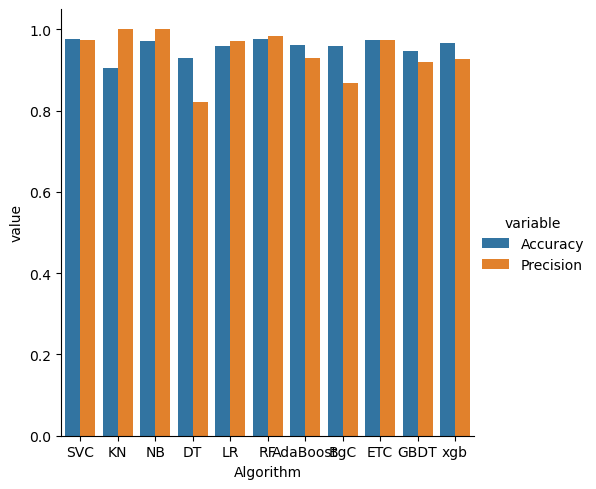

In [588]:
# Plotting graphs w.r.t to the algorithms
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1, kind='bar',height=5)

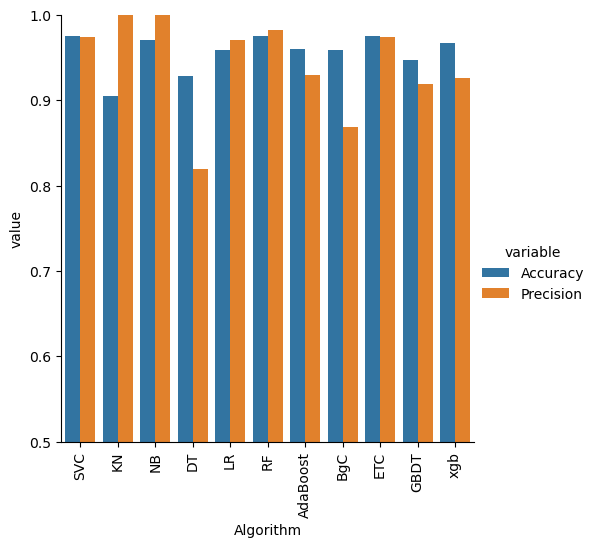

In [590]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1)
plt.xticks(rotation='vertical')
plt.show()

In [592]:
# MERGING BOTH THE DATA ( OLD+IMPROVED) in the column
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})


In [594]:
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.975822,0.974790
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
3,DT,0.928433,0.820000
4,LR,0.958414,0.970297
5,RF,0.975822,0.982906
6,AdaBoost,0.960348,0.929204
7,BgC,0.958414,0.868217
8,ETC,0.974855,0.974576
9,GBDT,0.946809,0.919192


In [596]:
# MERGED TABLE
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.975822,0.974790,0.975822,0.974790
1,KN,0.905222,1.000000,0.905222,1.000000
2,NB,0.970986,1.000000,0.970986,1.000000
3,DT,0.928433,0.820000,0.928433,0.820000
4,LR,0.958414,0.970297,0.958414,0.970297
5,RF,0.975822,0.982906,0.975822,0.982906
6,AdaBoost,0.960348,0.929204,0.960348,0.929204
7,BgC,0.958414,0.868217,0.958414,0.868217
8,ETC,0.974855,0.974576,0.974855,0.974576
9,GBDT,0.946809,0.919192,0.946809,0.919192


In [598]:
# scaling was tried , but it didn't improved the performance ,
# despite it decreased the precision score, So Scaling values are not being considered further


In [600]:
# Also , experimented on no of words and,
# USING voting classifier( combining multiple algorithms models)
# WIth Stacking also , But no suuficient Improvements were seen
# and many more , which were not tried

In [602]:
# So, we will consider our TF-IDF ----with-----> mnb (Multi-Nomial Naive Bayes)   

# 7. Website creation for the project

In [609]:
#, "pickle" refers to a built-in module that allows you to serialize and deserialize Python objects, essentially meaning you can convert complex data structures into a byte stream to store them in a file and later retrieve them back as their original form, effectively "saving" the state of your data or objects between program sessions; 
#   creation of two files ( vectorize.pkl", 'model.pkl')
import pickle
pickle.dump(tfidf, open("vectorizer.pkl", 'wb'))  # wb---> write binary
pickle.dump(mnb, open("model.pkl", 'wb'))

# ------------- COMPLETED -------------
